# Final Project: Are you approved? Machine Learning Loan Approvals Using Perceptron and Ridge Ordinary Least Squares

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> *Walter Nguyen* </span>

In [249]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [250]:
print('hello world!')

hello world!


In [251]:
# Load my data tysm
loan_df = pd.read_csv('loan_data.csv') #call back to data exploration

### Data Visualization

What are we looking at?

In [252]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [253]:
display(loan_df)
non_nums = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [254]:
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


loan_status
0    35000
1    10000
Name: count, dtype: int64


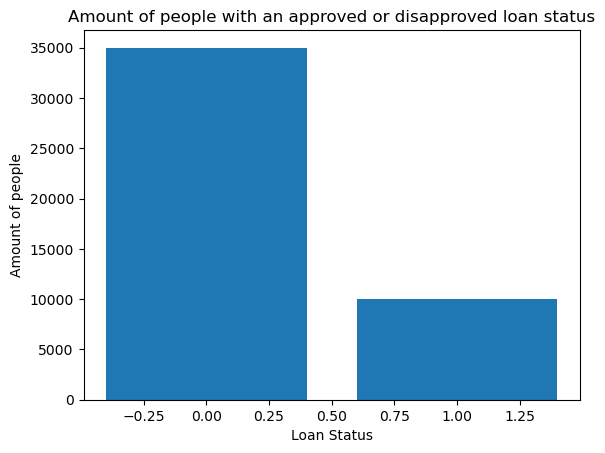

In [310]:
loan_count = loan_df.value_counts(subset="loan_status")
print(loan_count)
plt.bar(x = loan_count.index,height=loan_count)
plt.xlabel("Loan Status")
plt.ylabel("Amount of people")
plt.title('Amount of people with an approved or disapproved loan status')

plt.show()

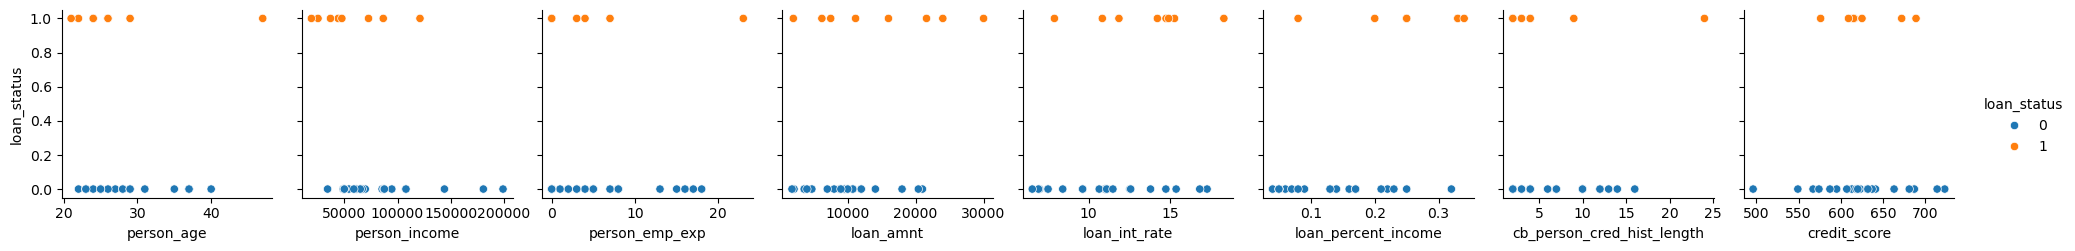

In [311]:
#from the derivatives homework
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(loan_df)), size=30, replace=False)
data_values = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
seaborn.pairplot(loan_df.iloc[indices],hue='loan_status',x_vars=data_values,y_vars='loan_status')
plt.show()

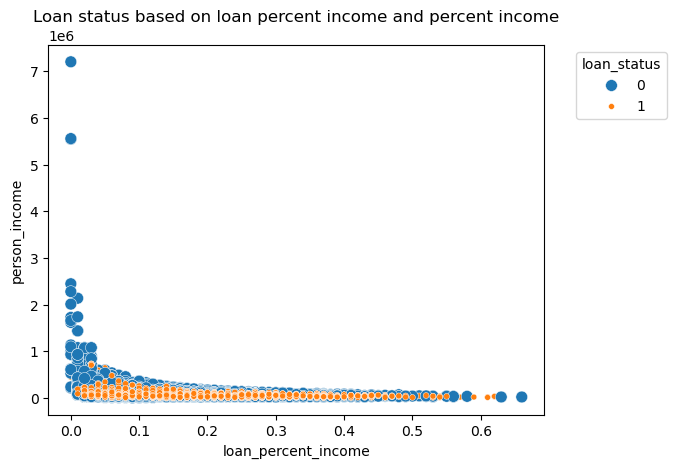

In [314]:
seaborn.scatterplot(loan_df,x='loan_percent_income',y='person_income',hue='loan_status',size='loan_status')
plt.legend(title="loan_status", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Loan status based on loan percent income and percent income")
plt.show()

### Preprocessing (yay!)

How do we prepare the data?

In [297]:
#From Curved Fitting and Regularization Homework
def poly_features(X: np.ndarray, degree: int) -> np.ndarray:
    """ Compute polynomial features for pass data

        Args:
            X: Matrix of input data for which polynomial features
                will be computed for.

            degree: The degree of the polynomial which will be computed.

        Return:
            A matrix containing the original data and the new polynomial data.
    """
    X_poly = X
    if(degree > 1):
        for i in range(2,degree):
            temp = np.power(X,i)
            X_poly = np.append(X_poly,temp,axis=-1)
        temp = np.power(X,degree)
        X_poly = np.append(X_poly,temp,axis=-1)
        
    return X_poly

In [299]:
# From homework
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
) -> Tuple[np.ndarray]:
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None
    X_trn, X_tst, y_trn, y_tst = train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn,y_trn,train_size=0.80,test_size=0.20,random_state=42)
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [336]:
#FOR ROLS
from sklearn.preprocessing import StandardScaler
def get_preprocessed_data(degree: int)  -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Args:
            degree: The degree to use when computing polynomial features. 
        
        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X = loan_df.drop(non_nums, axis=1).values
    y = loan_df['credit_score'].values

    X_poly  = poly_features(X,degree)

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X_poly,y)
    
    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    bias_trn = np.ones((len(X_trn), 1))
    bias_vld = np.ones((len(X_vld), 1))
    bias_tst = np.ones((len(X_tst), 1))
    X_trn = np.hstack((bias_trn,X_trn))
    X_vld = np.hstack((bias_vld,X_vld))
    X_tst = np.hstack((bias_tst,X_tst))
    

    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [343]:
#FOR PERCEPTRON
from sklearn.preprocessing import StandardScaler
def get_preprocessed_data(pos_class: List[int], neg_class: List[int])  -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Args:
            pos_class: list of labels that will be used for 
                the positive class.

            neg_class: list of labels that will be used for 
                the negative class.

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X,y = binarize_classes(loan_df[data_values],loan_df['loan_status'],pos_class,neg_class)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= get_train_valid_test_data(X,y)
    

    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    
    bias_trn = np.ones((len(X_trn), 1))
    bias_vld = np.ones((len(X_vld), 1))
    bias_tst = np.ones((len(X_tst), 1))
    X_trn = np.hstack((bias_trn,X_trn))
    X_vld = np.hstack((bias_vld,X_vld))
    X_tst = np.hstack((bias_tst,X_tst))
    

    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

## Metrics

In [208]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

## Algorithim #1 (Perceptron)

In [322]:
loan_df['loan_status'] #Classification problem

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [323]:
#From Perceptron HW

In [324]:
def binarize_classes(
    X: np.ndarray,
    y: np.ndarray,
    pos_class: List[int], 
    neg_class: List[int]
) -> Tuple[np.ndarray, np.ndarray]:
    """ Converts data into a one-vs-all or one-vs-one prolbem
        according to labels passed as pos or neg.

        Args:
            X: Input data given as matrix

            y: Labels corresponding to input data given as 1D vector

            pos_class: list of labels that will be used for 
                the positive class.

            neg_class: list of labels that will be used for 
                the negative class.

        Returns:
            Two arrays where the 1st corresponds to the data
            given as a matrix and the 2nd corresponds to the
            new labels given as a 1D vector.
    """
    X = X.copy()
    y = y.copy()
    
    X_pos, y_pos = None, None
    pos_locs = np.isin(y, pos_class)
    X_pos = X[pos_locs]
    y_pos = y[pos_locs]
    y_pos[:] = 1
    
    X_neg, y_neg = None, None
    neg_locs = np.isin(y, neg_class)
    X_neg = X[neg_locs]
    y_neg = y[neg_locs]
    y_neg[:] = -1
    
    
    return np.vstack([X_pos, X_neg]), np.hstack([y_pos, y_neg])

In [325]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the accuracy between two 1D vectors

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Return:
            A float corresponding to the accuracy
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency

    are_same = y == y_hat

    total_correct = np.sum(are_same)

    total_samples = len(y)
    
    result = total_correct/total_samples
    
    return result

In [326]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_name_key: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_name_key: A dictionary where each key corresponds to 
                a label in y and the values corresponding to string name 
                for said label. This name will be displayed when plotting.

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    cfm = confusion_matrix(y,y_hat)
    
    
    labels = np.sort(np.unique(y))
    if class_name_key is not None:
        classes = []
        for l in labels:
            class_name = class_name_key.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    seaborn.heatmap(cfm_df, annot=True)

    return cfm_df

In [327]:
def ppv(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the PPV or precision score

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Returns:
            A float corresponding to the PPV value.
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    tn, fp, fn, tp = confusion_matrix(y,y_hat).ravel()
    bottom = tp + fp
    result = tp/bottom
    
    return result

In [328]:
def tpr(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the TPR or recall score

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Returns:
            A float corresponding to the TPR value.
    """
    tn, fp, fn, tp = confusion_matrix(y,y_hat).ravel()
    bottom = tp + fn
    result = tp/bottom
    
    return result

In [329]:
def tnr(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the TNR or specificity score

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

        Returns:
            A float corresponding to the TNR value.
    """
    tn, fp, fn, tp = confusion_matrix(y,y_hat).ravel()
    bottom = tn + fp
    result = tn/bottom
    
    return result

In [330]:
class Perceptron():
    """ Performs binary classification using Rosenblatt's perceptron
    
        Attributes:

            alpha: learning rate or step size
 
            epochs: Number of epochs to run for mini-batch
                gradient descent
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            w: Vector of weights 

            trn_acc: List that stores training accuracy for each epoch.

            vld_acc: List that stores validation accuracy for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        seed: int = 0,
        epochs: int = 1,
    ):
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        self.w = None
        self.trn_acc = None
        self.vld_acc = None

    def fit(
         self, X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """ Train the perceptron to find optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed) # Set seed for reproducibility
        self.trn_acc = []
        self.vld_acc = []
        self.w = np.random.rand(X.shape[1],1)
        
        for e in range(self.epochs):
            misclassified = 0
            for m in range(len(X)):
                z = np.dot(self.w.T,X[m])
                y_hat = np.sign(z)
                if y_hat != y[m]:
                    misclassified += 1
                    self.w = self.w + ((self.alpha * y[m]) * X[m].reshape(-1,1))
                    
            trn_preds = self.predict(X)
            trn_acc = accuracy(y, trn_preds)
            self.trn_acc.append(trn_acc)
            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_acc = accuracy(y_vld, vld_preds)
                self.vld_acc.append(vld_acc)
                
            if misclassified == 0:
                break
        
        return self 
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        result = np.dot(X,self.w)
        return np.sign(result)

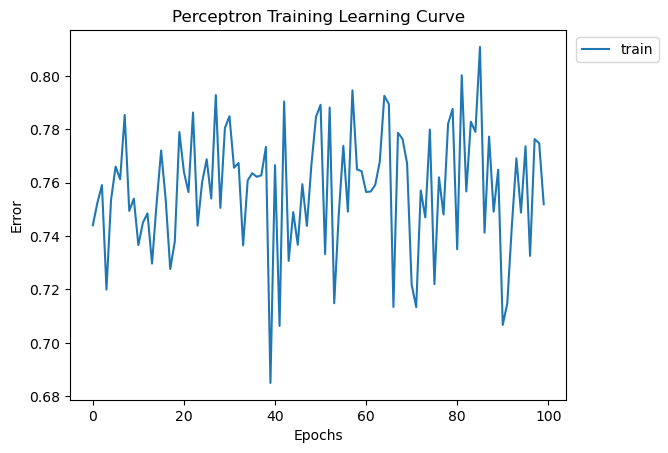

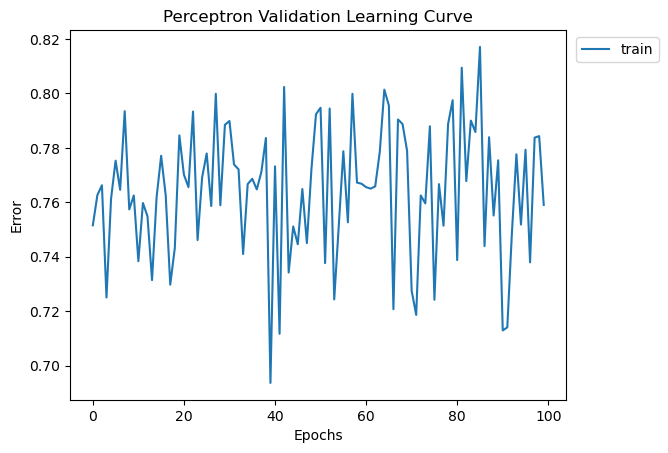

Train Accuracy:0.7577253472222223
Validation Accuracy:0.7642708333333332
Test Accuracy:0.7481111111111111
TPR of Testing (Recall):0.3567937438905181
TNR of Testing (Specifics):0.863244176013805
PPV of Testing (Precision):0.43426531826293874


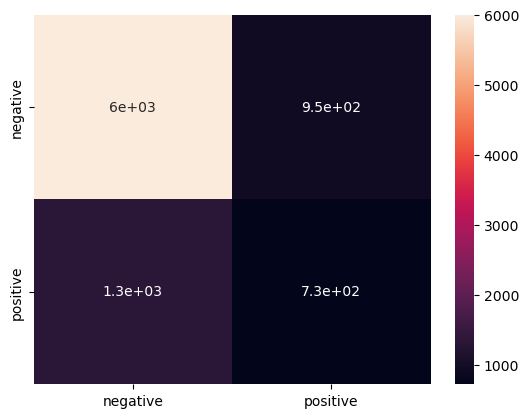

In [346]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(pos_class=[1], neg_class=[0])
perceptron = Perceptron(alpha=.1, epochs=100,seed=42) #seed set to 42 for consistency
perceptron.fit(X_trn,y_trn,X_vld,y_vld)
perceptron.predict(X_trn)

plt.plot(perceptron.trn_acc, label='train')
plt.title("Perceptron Training Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

# perceptron.predict(X_vld)

plt.plot(perceptron.vld_acc, label='train')
plt.title("Perceptron Validation Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

y_hat = perceptron.predict(X_tst)
test_TPR = tpr(y_tst,y_hat)
test_TNR = tnr(y_tst,y_hat)
test_ppv = ppv(y_tst,y_hat)

tst_acc = accuracy(y_tst,y_hat)

cfm_df = plot_confusion_matrix(
        y=y_tst, 
        y_hat=y_hat, 
        class_name_key={
        -1: 'negative',
        1: 'positive'
        }
    )

print(f'Train Accuracy:{np.mean(perceptron.trn_acc)}')
print(f'Validation Accuracy:{np.mean(perceptron.vld_acc)}')
print(f'Test Accuracy:{np.mean(tst_acc)}')
print(f'TPR of Testing (Recall):{test_TPR}')
print(f'TNR of Testing (Specifics):{test_TNR}')
print(f'PPV of Testing (Precision):{test_ppv}')


## Algorithim #2 (Ridge Ordinary Least Squares)

In [337]:
class RidgeOrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:

            lamb (float): Regularization parameter for controlling
                L2 regularization.

            w: Vector of weights 

    """
    def __init__(self, lamb: float):
        self.lamb = lamb
        self.w = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector

             Returns:
                The class's own object reference. 
        """
        identity_matrix = np.eye(X.shape[1]) 
        identity_matrix[0,0] = 0
        inside = X.T @ X + self.lamb * identity_matrix
        complete_inside = np.linalg.pinv(inside)
        outside = X.T @ y
        self.w = complete_inside @ outside
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        result = np.dot(X,self.w)
        return result

## Training Algorithim #2 (Ridge Ordinary Least Sqaures)

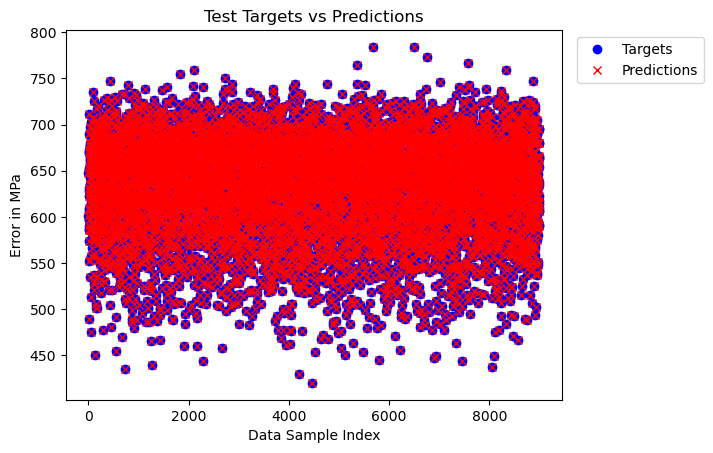

Training MSE: 1.5140284887865962e-05
Training RMSE: 0.0038910518999193473
Testing MSE: 1.9372333583298578e-05
Testing RMSE: 0.004401401320409055


In [342]:
# Get training and testing data
X_trn, y_trn, _, _, X_tst, y_tst = get_preprocessed_data(
    degree= 5
)

rols = RidgeOrdinaryLeastSquares(lamb=0.01)
rols.fit(X_trn,y_trn)
y_hat = rols.predict(X_trn)
trn_mse = mse(y_trn, y_hat)
trn_rmse = rmse(y_trn, y_hat)
y_hat_tst = rols.predict(X_tst)
tst_mse = mse(y_tst, y_hat_tst)
tst_rmse = rmse(y_tst, y_hat_tst)

## Plotting Code ###
plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_hat_tst, 'xr', label='Predictions')
plt.xlabel("Data Sample Index")
plt.ylabel("Error in MPa")
plt.title("Test Targets vs Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()


### Display Weights ###
# print(f"Weights:\n{rols.w.flatten()}")

print(f"Training MSE: {trn_mse}")
print(f"Training RMSE: {trn_rmse}")
print(f"Testing MSE: {tst_mse}")
print(f"Testing RMSE: {tst_rmse}")